### Project 2020

### Programming for Data Analysis


This project creates and models a simulated data set related to a chosen real-world phenomenon using the numpy.random package in Python.  This approach is taken rather than collecting the data.

The elements explored will be:

(i)   Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

(ii)  Investigate  the  types  of  variables  involved,  their  likely  distributions,  and  their relationships with each other.

(iii) Synthesise/simulate a data set as closely matching their properties as possible.

(iv)  Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be     displayed in an output cell within the notebook.

### Project Outline:

#### Factors affecting length of stay of dogs in animal shelters 

For this project I based the simulated data on the real world phenomenon of factors that contribute to the duration of a dog's length of stay in an animal shelter from entry to adoptions.

I concluded the main measurable factors that influence the duration of a dog's stay are:
    
    * Age
    * Gender
    * Coat Colour    
    * Size

I will explore each of these factors in the following sections and how they combined to affect a dog's likelyhood of achieing a speedy adoption.

### Import Modules:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Set up the Data Set:

In [2]:
#Create a new Dataframe for the data

pd.set_option("display.precision", 1) #Use 3 decimal places in output display
df = pd.DataFrame() #Create the headers for the data

### Import Austin Data Set:

In [3]:
# Read the data file.
#df1 = pd.read_csv('https://query.data.world/s/4dhuacn0l3k8nw0f5strehu96',names = None , index_col = 0,header = 0)

In [4]:
#df1.describe()

### Relationship between key factors:

#### Length of Stay: 

The median time for adoptions was 28 days (UK)

https://www.researchgate.net/publication/244642863_Factors_affecting_time_to_adoption_of_dogs_re-homed_by_a_charity_in_the_UK

https://veterinaryrecord.bmj.com/content/161/9/283.2

#### Age: 
Puppies and smaller 'lapdogs' were adopted soonest, with an average stay of just 13 days.

The average length of stay during this period was 35 days. Puppies were adopted fastest, with a stay of 23 days for puppies under six months and 33 days for the older puppies. Adult dogs had an average wait of 42 days before they were adopted.

https://faunalytics.org/effects-of-phenotypic-characteristics-on-the-length-of-stay-of-dogs-at-two-no-kill-animal-shelters-2/

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

The average length of stay for dogs over the age of 7 was 89 days ranging between 1 to 367 days. 
The average length of stay of the general population is 51 days.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5867524/

47.7% of dogs surrendered were aged between 5 months and 3 years

https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/

Puppy (0-1 years) 26%; Adult (1-3 years) 66%; Adult (4-7 years)  Senior (7+) 9%

https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv

#### Gender: 

Male are adopted faster (20 days on average) than their female counterparts (22 days).

https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Project+Report.pdf

The split of male to female dogs based on 36,000 dogs in the 'Austin animal shelter dataset' was 0.33 male and 0.67 female.

https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv

This result was supported by a UK study of 16,000 shelter dogs which found that females were more likely to be adopted.

https://www.companionanimalpsychology.com/2015/11/large-study-finds-no-evidence-for-black.html

Close to equal numbers of male and female dogs were surrendered. 

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

#### Colour: 
Coat colour made no difference to length of stay. Black dogs did not take longer to be adopted. Brindle dogs and multi-colour dogs took longer 

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

'Black dog syndrome' has been debated a great deal and remains inconclusive.

#https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/

The rehoming rate for black and non-black dogs was identical, at 88.5%.

#https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/

Black dogs did not take longer to be adopted at either of the two shelters taking part in this study. In fact, brindle dogs had a longer wait at both shelters, and multi-colour dogs also took longer at one of the shelters. Black dogs were not more likely to be euthanized. Age and breed group were more important than coat colour when it came to adoptability.

#### Size:
Length of stay increased with age and was highest for medium-sized dogs

https://faunalytics.org/effects-of-phenotypic-characteristics-on-the-length-of-stay-of-dogs-at-two-no-kill-animal-shelters-2/

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

There was an effect of size, with the XS dogs being adopted soonest, followed by the small dogs. The medium-sized dogs were the ones with the longest stay. The authors say that the XL dogs (such as St Bernards) were quite unique and likely were adopted out because of this. Some people may also have had size restrictions imposed by their landlords or condominium councils that meant they could only have a small or extra-small dog.

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

### Simulating key variables:

### Age:

#### Assumptions - Expected Distribution:

< 1 year     26%
1 year       22%
2 years      19%
3 years      10%
4 years       6%
5 years       5%
6 years       3%
7-9 years +   5%
10  years +   4%

Based on Austin Dataset

#### Simulating the 'Age' dataset:

In [50]:
#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.triangular() to create an array between 1 month and 156 months (13 years) skewed around 6 months
Age = (np.random.triangular (1, 6, 156, size=200))
Age = np.round (Age)

#Populate the 'Age' column with 200 samples aged 1 month to 13 years.
df['Age_Mths'] = Age

In [49]:
#Option to show the dataset 
#print(df['Age_Mths'])

#### Plot the 'Age' dataset result:

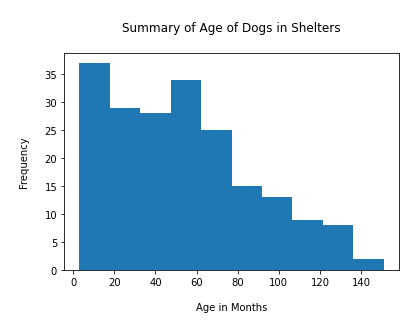

In [7]:
plt.hist(Age)
plt.title("\nSummary of Age of Dogs in Shelters\n")
plt.xlabel("\nAge in Months")
plt.ylabel("\nFrequency\n")
plt.show()

### Gender:

#### Assumptions:

Male   - 54%
Female - 46%

Based on Austin Dataset.

#### Simulating the 'Gender' Dataset

In [8]:
#Create the Male/ Female object
sex = ['Male','Female']

#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.choice () to create an array with a probability of 54%:46% male:female ratio & 
#populate the 'Gender' column with male & female samples
Gender = np.random.choice(sex, size = 200, replace = True, p = [0.54,0.46])

#Populate the 'Gender' column with 200 samples.
df['   Gender  '] = Gender

In [46]:
#Option to show the dataset 
#print(df['   Gender  '])

#### Plot the 'Gender' dataset result:

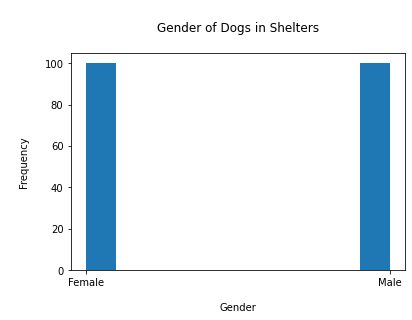

In [10]:
plt.hist (Gender)
plt.title("\nGender of Dogs in Shelters\n")
plt.xlabel("\nGender")
plt.ylabel("\nFrequency\n")
plt.show()

### Coat Colour:

#### Assumptions:

Light (White/Grey/Gold)     - 30%
Black                       - 30%
Brown/Multi- Colour         - 40%

#### Simulating the 'Coat Colour' dataset:

In [11]:
#Create the Male/ Female object
colour = ['Light','Brown','Black']

#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.choice () to create an array with a probability of 33%:67% male:female ratio & populate the 'Gender' column with male & female samples
Colour = np.random.choice(colour, size = 200, replace = True, p = [0.3,0.4,.3])

#Populate the 'Colour' column with 200 samples.
df['   Colour'] = Colour

In [53]:
#Option to show the dataset 
#print(df['   Colour'])

#### Plot the 'Coat Colour' dataset result:

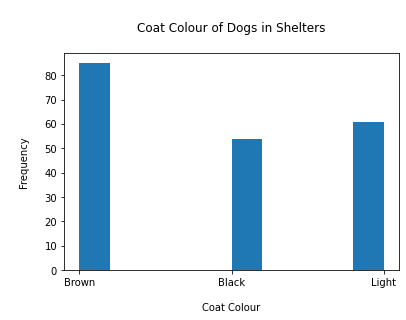

In [13]:
plt.hist (Colour)
plt.title("\nCoat Colour of Dogs in Shelters\n")
plt.xlabel("\nCoat Colour")
plt.ylabel("\nFrequency\n")
plt.show()

### Size:

#### Assumptions:
Small 30%; Medium 29%, Large 40%; X-Large 1%

#### Simulating the 'Size' dataset:

In [14]:
#Create the Size Object
Status = ['Small','Medium','Large','X-Large']

#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.choice () to create an array with a probability of 30%:29%:40%:1% 
Size = np.random.choice(Status, size = 200, replace = True, p = [.3,.29,.4,.01])

#Populate the 'Size' column with Small, Medium,Large & X-Large samples
df['   Size'] = Size

In [15]:
# Option to show the dataset 
#print(df['Size'])

#### Plot the 'Size' dataset results:

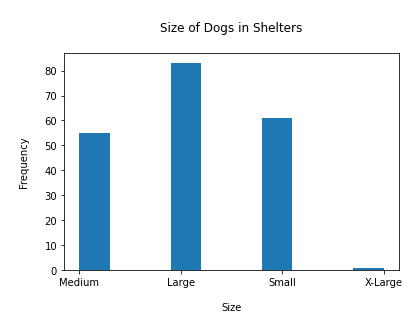

In [16]:
plt.hist (Size)
plt.title("\nSize of Dogs in Shelters\n")
plt.xlabel("\nSize")
plt.ylabel("\nFrequency\n")
plt.show()

### Length of Stay:

#### Assumptions:

In [17]:
#### Simulating the 'Length of Stay' dataset:

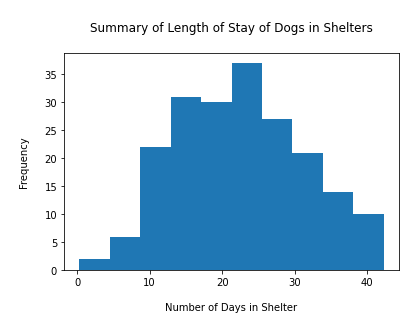

In [18]:
#Trial np.normal
#Set seed to zero to produce a consistent result
np.random.seed(0)
LOS1 =  np.random.normal(loc=22, scale=8.5, size=200)
#df['Days in Shelter1'] = LOS1
#Option to show the dataset 
#print(df['Days in Shelter1'])
plt.hist(LOS1)
plt.title("\nSummary of Length of Stay of Dogs in Shelters\n")
plt.xlabel("\nNumber of Days in Shelter")
plt.ylabel("\nFrequency\n")
plt.show()
#I determined thatnp.random.normal did not reflect the breadth of values required so I opted for np.random.triangular()

In [44]:
np.random.seed(0)#Set seed to zero to produce a consistent result
#Use random.triangular() to create an array between 1 day and 365 days (1 year) skewed around 22 days
LOS = (np.random.triangular (1, 22, 365, size=200))
#LOS = np.round(LOS)
#Populate the 'Days in Shelter' column with 200 samples aged 1 month to 13 years.
df['Duration (Days)'] = LOS
pd.set_option("display.precision", 0)# Use 0 decimal places in output display

In [20]:
#Option to show the dataset 
#print(df['Duration (Days)'])

#### Plot the 'Length of Stay' dataset result:

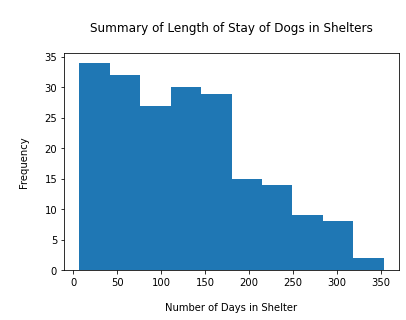

In [21]:
plt.hist(LOS)
plt.title("\nSummary of Length of Stay of Dogs in Shelters\n")
plt.xlabel("\nNumber of Days in Shelter")
plt.ylabel("\nFrequency\n")
plt.show()

<BR>

### Create a summary dataset:
***

In [22]:
#To delete unnecessary dataframes
#df = df.drop('Age(Yrs)', axis=1)

In [35]:
#To check for missing values
pd.set_option("display.max_rows", 200)#Display all entries
df.isnull();
# Option to print null value check
#print(df.isnull()) 

In [24]:
#To reset the index to start at 1 instead of zero
#https://stackoverflow.com/questions/32249960/in-python-pandas-start-row-index-from-1-instead-of-zero-without-creating-additi
df.index = np.arange(1, len(df) + 1)

In [41]:
#To create a new column calculating age in years based on 'Age_Mths/12'
#df.insert(2, 'Age_Yrs', np.nan) #Insert new column called 'Age_Yrs'
df['Age_Yrs'] = round(df.Age_Mths/ 12)

In [26]:
#Re-order the columns
df = df[['Duration (Days)', 'Age_Mths', 'Age_Yrs', '   Gender  ', '   Colour','   Size']]

In [43]:
#Format the Dataframe
pd.set_option("display.precision", 0)# Use 0 decimal places in output display
pd.set_option('expand_frame_repr', False) #print dataframe on a single line
#https://stackoverflow.com/questions/39482722/how-to-print-dataframe-on-single-line
pd.set_option("display.max_rows", 200)#Display all entries
pd.options.display.max_columns = 7 #Print 7 Columns
print(df)

     Duration (Days)  Age_Mths  Age_Yrs    Gender      Colour     Size
1                128        54        4      Female     Brown   Medium
2                176        75        6      Female     Black    Large
3                142        60        5      Female     Brown    Large
4                127        53        4      Female     Brown   Medium
5                 97        40        3        Male     Brown   Medium
6                155        65        5      Female     Brown    Large
7                100        42        4        Male     Brown   Medium
8                249       106        9      Female     Black    Large
9                298       127       11      Female     Black    Large
10                88        36        3        Male     Brown   Medium
11               204        86        7      Female     Black    Large
12               122        51        4        Male     Brown   Medium
13               133        56        5      Female     Brown   Medium
14    

In [28]:
#sns.relplot(x="Days in Shelter", y="Age", hue="Gender", size="weight",sizes=(40, 400), alpha=.5, palette="muted",height=6, data=mpg)

In [29]:
sns.relplot(x="Age", y="Gender", data=df)
plt.show()

ValueError: Could not interpret input 'Age'

### References:
https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics

https://www.petfinder.com/pet-adoption/dog-adoption/pets-relinquished-shelters/

https://pubmed.ncbi.nlm.nih.gov/32575574/#&gid=article-figures&pid=figure-2-uid-1

https://www.thejournal.ie/dogs-abandoned-5194543-Sep2020/

https://news.orvis.com/dogs/when-is-it-time-to-surrender-your-dog

https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/

https://veterinaryrecord.bmj.com/content/161/9/283.2

https://pubmed.ncbi.nlm.nih.gov/29557174/

https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2020/07/21083509/MACH-EndYear2019.pdf

https://apnews.com/article/218042cf3f684525874f48ae990ed49b

https://www.hillspet.com/dog-care/new-pet-parent/common-reasons-adopted-dogs-are-returned-to-shelters

https://data.bloomington.in.gov/dataset/animal-care-and-control/resource/7a847ec2-31c6-48e3-b0bc-02af2fa94587

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

Re-homing stats:
https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Project+Report.pdf

Older dog study:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5867524/